# Ejercicio 6 
Se le propone a un grupo de niños y niñas una actividad: construir torres lo más altas posible usando bloques cúbicos y cilíndricos. Se registran en https://github.com/franciscokordon/estainferencia/blob/main/data/blocks.csv las edades de los infantes, el número de bloques y el tiempo empleado. En este problema, solo consideramos el número de bloques utilizados y las edades.

* (a) Graficar el número de bloques 𝑦 vs las edades 𝑥. A partir del gráfico, proponer un MLG.
* (b) Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión 𝛽.
* (c) Determinar el error estándar de cada parámetro de regresión.

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

ruta = '/workspaces/Estadistica1/Practica MLG/blocks.csv'
df = pd.read_csv(ruta, delimiter=',')


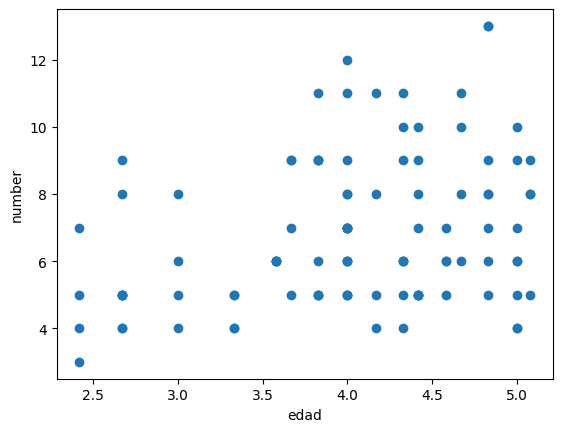

In [12]:
plt.scatter(df['Age'], df['Number'])
plt.xlabel('edad')
plt.ylabel('number')    
plt.show()

planteamos el GML como $Y~ Poisson(\mu)$,   
$\eta =  log(\mu) = g(\mu) = \beta_0 + \beta_1 x$  
$\kappa(\theta) = \mu = e^{\theta}$ y $\phi = 1$

### 6.b 
Ajustamos el modelo por maxima verosimiitud


La distribución de Poisson es:  

$$f(y,\lambda)= \frac{(e^{-λ}  λ^y)} {y!}$$  

recordamos que lambda es igual a mu, entonces queda:  
$$f(y,\mu)= \frac{(e^{-\mu}  \mu^y)} {y!}$$  


La likelihood quedaria algo como:  
$$L(y_i,\mu_i) =  \prod_{i=1}^{n}\frac{e^{-\mu_{i}}\mu_{i}^{y_{i}}}{y_i!}$$  

$$= \prod_{i=1}^{n}\frac{e^{-e^{\beta_0 + \beta_1 x_i}}e^{(\beta_0 + \beta_1 x_i)y_{i}}}{y_i!} =$$  

$$l(y_i;\beta_0,\beta_1) = \sum_{i=1}^{n} \left[-e^{\beta_0 + \beta_1 x_i} + (\beta_0 + \beta_1 x_i)y_i- log(y_i!) \right]$$  

$$ = \sum_{i=1}^{n} (-e^{\beta_0 + \beta_1 x_i} + (\beta_0 + \beta_1 x_i)y_i)$$  

* hacemos las derivadas de para cada beta e igualamos a 0  

$\beta_1$
$$
\frac{\partial }{\partial \beta_1}(\sum_{i=1}^{n}\left[-e^{\beta_0 + \beta_1 x_i} + (\beta_0 + \beta_1 x_i)y_i \right]) = 0$$  
$$
\sum_{i=1}^{n}(-x_i e ^{\beta_0 + \beta_1 x_i} + x_i y_i)=0$$  

$\beta_0$  
$$
\frac{\partial }{\partial \beta_0}(\sum_{i=1}^{n}\left[-e^{\beta_0 + \beta_1 x_i} + (\beta_0 + \beta_1 x_i)y_i \right]) = 0$$  
$$
= \sum_{i=1}^{n}(-e^{\beta_0 + \beta_1 x_i} + y_i) = 0$$  


In [18]:
def neg_log_likelihood_poisson(beta, X, Y):
    mu_ = np.exp(np.dot(X, beta)) 
    return -np.sum(Y*np.log(mu_) - mu_)

b0 =  1.3446995890202804
b1 =  0.1415095443010225


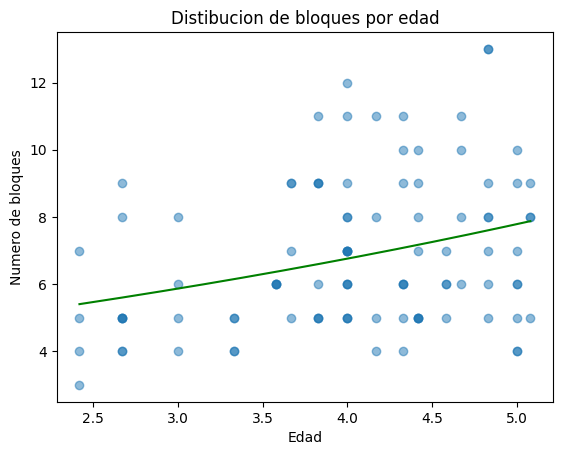

In [19]:
from scipy.optimize import minimize

X,Y = df["Age"], df["Number"]

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args=(X_with_intercept, Y))

b0 = res_poisson.x[0]
b1 = res_poisson.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
poisson_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,poisson_fit,color='g')
ax.set_xlabel("Edad")
ax.set_ylabel("Numero de bloques")
ax.set_title("Distibucion de bloques por edad")
plt.show()

### 6.c
Determinar el error estándar de cada parámetro de regresión.

Para esto necesito obtener la matriz de Fischer de la distribución:

$$I = \frac{1}{\phi}X^TWX \hspace{1cm}\text{ con }W = \text{diag}(\frac{1}{V(\mu_i)(d\eta_i/d\mu_i)^2}) $$

En nuestro caso:
$$\phi = 1 $$

$$ V(\mu) = \mu $$

$$ \frac{d\eta}{d\mu} = \frac{d(\log(\mu))}{d\mu} = \frac{1}{\mu}$$

por lo tanto $$I = X^TWX \hspace{1cm}W = \text{diag}(\mu_i) = \text{diag}(e^{\beta_0 + \beta_1x_i}) $$

Finalmente, la matriz de covarianza es $I^{-1}$ y su diagonal, las varianzas respectivas de $\beta_0$ y $\beta_1$:


In [20]:
from numpy.linalg import inv

mu = np.exp(X_with_intercept@res_poisson.x)
W = np.diag(mu)
I = X_with_intercept.T@W@X_with_intercept
cov_matrix = inv(I)
cov_matrix

array([[ 0.04944116, -0.01169638],
       [-0.01169638,  0.0028516 ]])

El error estándar de los coeficientes $\beta_0$ y $\beta_1$ se obtiene tomando la raíz cuadrada de los elementos diagonales de la matriz de varianzas-covarianzas:  
$$SE(\hat{\beta}) = \sqrt {diag((X^{T}WX)^{-1})}$$

In [21]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.22235367633510356
se(b1) = 0.05340040219094002


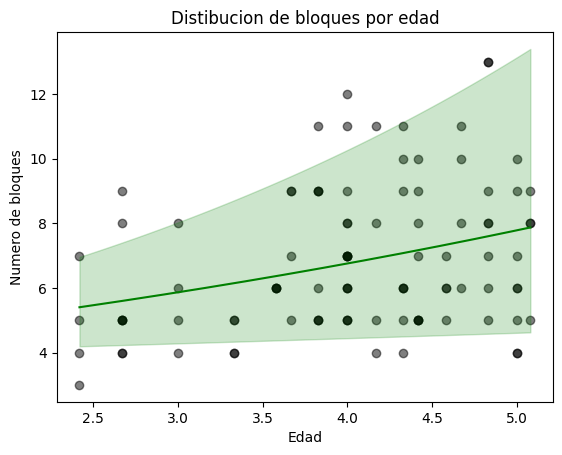

In [22]:
#muestro los errores en gráfico a partir de un IC.95 para b1 a b0 constante
mu_alto = np.exp(b0 + (b1 + se_b1 *1.96) * x_range)
mu_bajo = np.exp(b0 + (b1 - se_b1 *1.96) * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5,color='k')
ax.plot(x_range,poisson_fit,color='g')
ax.fill_between(x_range, mu_bajo, mu_alto, alpha=0.2,color = 'g')

ax.set_xlabel("Edad")
ax.set_ylabel("Numero de bloques")
ax.set_title("Distibucion de bloques por edad")
plt.show()